# NLP Pipeline

1. Use existing package in python to extract theme and do sentiment analysis
    - try the pipeline on the 
2. Produce a dashboard for visualisations on the trend of user comments (with the time variable)

Dataset: bank_reviews3.csv

# 1. Import Relevant Packages

In [90]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/zy/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/zy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 1.1 Import Sample Dataset

In [ ]:
feedback_df = pd.read_csv('../data/bank_reviews3.csv')

# 2. Construct Relevent Functions

## 2.1 Function for Sentiment Analysis and Theme Extraction

In [72]:
def comment_analysis(date, title, comment) -> dict:
    dict = {}
    dict['date'] = date
    dict['title'] = title
    dict['comment'] = comment

    analysed_title = TextBlob(title)
    analysed_comment = TextBlob(comment)

    # sentiment analysis
    dict['polarity'] = (analysed_title.sentiment.polarity + analysed_comment.sentiment.polarity)/2
    #dict['subjectivity'] = analysed_comment.sentiment.subjectivity
    
    # theme extraction
    dict['themes'] = analysed_comment.noun_phrases

    return dict

## 2.2 Function for Constructing a New Dataset for Further Analysis

In [67]:
def construct_dataset(dates, titles, comments):
    dataset = []

    for date, title, comment in zip(dates, titles, comments):
        dataset.append(comment_analysis(date, title, comment))
    
    return pd.DataFrame(dataset)

## 2.3 Sample Analysis on the Sample Dataset

In [77]:
date_list = pd.to_datetime(feedback_df['date']).dt.strftime('%Y-%m-%d')
title_list = feedback_df['review_title_by_user']
comment_list = feedback_df['review'].tolist()

nlp_dataset = construct_dataset(date_list, title_list, comment_list)

# 3. Further Analysis on Comment Sentiment

## 3.1 Data Pre-Processing

In [79]:
negative_polarity = nlp_dataset[nlp_dataset['polarity'] < 0]['polarity']
positive_polarity = nlp_dataset[nlp_dataset['polarity'] > 0]['polarity']

q_neg = negative_polarity.quantile(0.10)
q_neu_lower = negative_polarity.quantile(0.90)
q_neu_upper = positive_polarity.quantile(0.10)
q_pos = positive_polarity.quantile(0.90)

bins = [-1, q_neg, q_neu_lower, q_neu_upper, q_pos, 1]
labels = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']

nlp_dataset['polarity_category'] = pd.cut(nlp_dataset['polarity'], bins=bins, labels=labels)

## 3.2 Visualisation for the Trend of Comment Sentiment

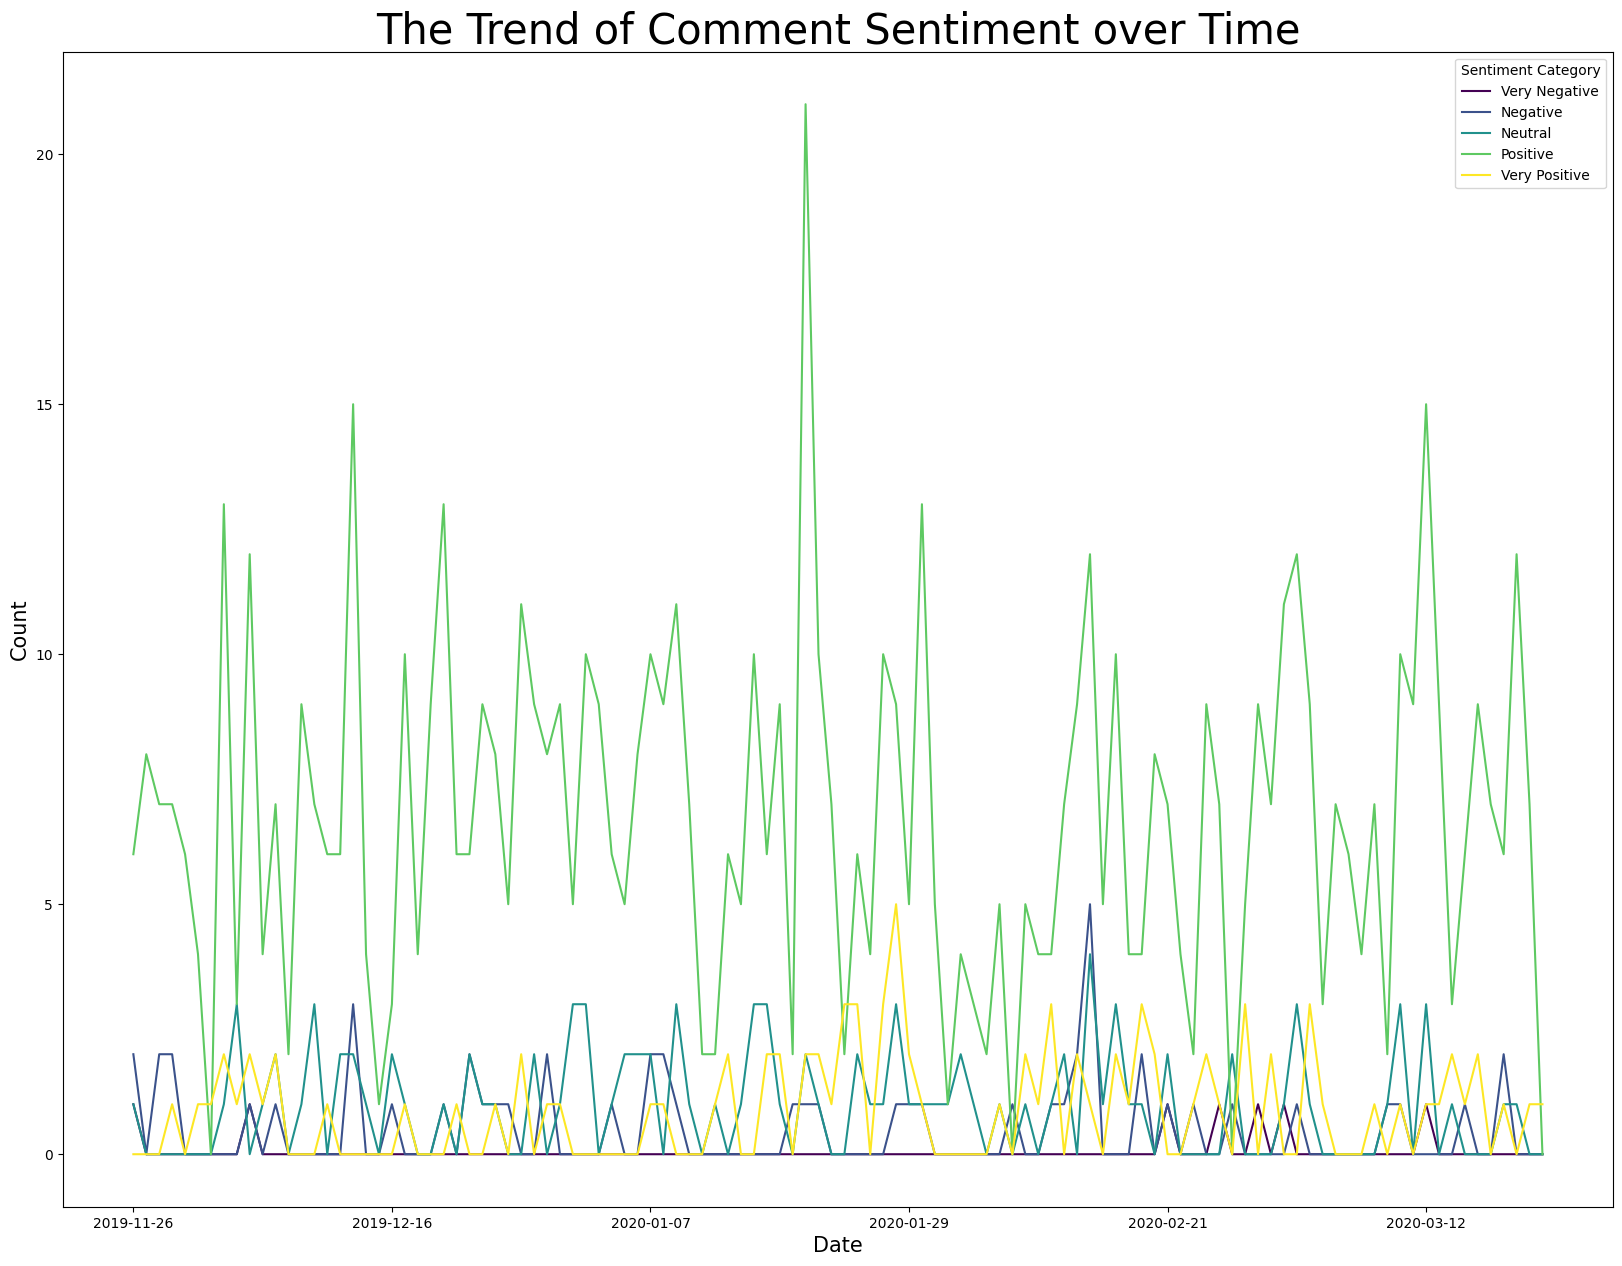

In [100]:
sentiment_trend = nlp_dataset.groupby('date')['polarity_category'].value_counts().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(20, 15))
sentiment_trend.plot(kind='line', ax=ax, colormap='viridis')
ax.legend(title = 'Sentiment Category')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.title('The Trend of Comment Sentiment over Time', fontsize=30)
plt.show()


# Enhanced Visualisation

Nodes: customers
Edges: if a customer comes from a same group

In [ ]:
import streamlit as sl